#    <font face="STCAIYUN" color=black size=7> <header><div style="text-align:center;"> Final Project of Data Science</div></font></header>

# <font color=blue size=6> Ⅰ. Background </font> 


# <font color=blue size=6>  Ⅱ. Research Procedure </font> 

# <font color=blue size=6>  Ⅲ. Import Libraries </font>

In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.pipeline import make_pipeline

#  <font color=blue size=6>  Ⅳ. Term & Character Analysis </font>

 <font color=black size=4>***Step 1: load book file&clean data***</font>

In [202]:
#excluded all the unnecessary and meaning 
excludes = ['the','and','to','of','i','a','in','it','that','is',
            'you','my','with','not','his','this','but','for',
            'me','s','he','be','as','so','him','your','was','had','have','I','we','from','here','there','said','t','on',
           'word','d','one','up','an','her','she','when','they','what','about','were','out','our','if','by','no','didn','am','"i','at',
            'just','all','or','and','would','then','them','who','into','than','all','down','over','way','day']
includes = ['major','snowball','nappoleon','squealer','boxer','clover','benjamin','moses','mollie','eminem','old major',
             'mr jones','mr pilkington','mr frederick','mr whymper','jones','pilkington','frederick','whymper','minimus','mr','mrs']
def getText():    
    txt=open('data/Animal Farm.txt','r').read()    
    txt=txt.lower()    
    for ch in "~@#$%^&*()_-+=<>?/,.:;{}[]|\'""":    
        txt=txt.replace(ch,' ')       
    return txt    

def delText(KiteRunner):    
#     txt=open('data/Animal Farm.txt','r').read()    
#     txt=txt.lower()
    for word in KiteRunner: 
        if word not in includes:
#             print(word)
            KiteRunner=KiteRunner.replace(word,'')
            
    return KiteRunner   
KiteRunner=getText()    
words=KiteRunner.split() 
words
# KiteRunner


['title',
 'animal',
 'farm',
 'author',
 'george',
 'orwell',
 'pseudonym',
 'of',
 'eric',
 'blair',
 '1903',
 '1950',
 'a',
 'project',
 'gutenberg',
 'of',
 'australia',
 'ebook',
 'ebook',
 'no',
 '0100011',
 'txt',
 'language',
 'english',
 'date',
 'first',
 'posted',
 'august',
 '2001',
 'date',
 'most',
 'recently',
 'updated',
 'march',
 '2008',
 'project',
 'gutenberg',
 'of',
 'australia',
 'ebooks',
 'are',
 'created',
 'from',
 'printed',
 'editions',
 'which',
 'are',
 'in',
 'the',
 'public',
 'domain',
 'in',
 'australia',
 'unless',
 'a',
 'copyright',
 'notice',
 'is',
 'included',
 'we',
 'do',
 'not',
 'keep',
 'any',
 'ebooks',
 'in',
 'compliance',
 'with',
 'a',
 'particular',
 'paper',
 'edition',
 'copyright',
 'laws',
 'are',
 'changing',
 'all',
 'over',
 'the',
 'world',
 'be',
 'sure',
 'to',
 'check',
 'the',
 'copyright',
 'laws',
 'for',
 'your',
 'country',
 'before',
 'downloading',
 'or',
 'redistributing',
 'this',
 'file',
 'this',
 'ebook',
 'is',

Analyze all terms in the book :

In [162]:

        
counts={}    
sumcount = 0  
for word in words:    
    counts[word]=counts.get(word,0)+1  
    sumcount = sumcount + 1 

counts_ex = counts.copy()    
for key in counts.keys():
    if key in excludes:
        
        counts_ex.pop(key)
items=list(counts_ex.items())    
items.sort(key=lambda x:x[1],reverse=True)    

for i in range(30):    
    word,count=items[i]    
    print('{0:<10}{1:>5}'.format(word,count))    

 #write all the output result into a txt file
outfile = open('data/Word Frequency Summary.txt', "w")    
lines = []      
lines.append('Word Type：'+str(len(items))+'\n')    
lines.append('Word Total Number：'+str(sumcount)+'\n')    
lines.append('Word Frequency(descending order):\n')    
lines.append('word\tcounts\n')    

s= ''    
for i in range(len(items)):    
    s = '\t'.join([str(items[i][0]), str(items[i][1])])    
    s += '\n'      
    lines.append(s)    
print('\nOutput printing finished！\n')    
outfile.writelines(lines)    
outfile.close()


<_io.TextIOWrapper name='data/Word Frequency Summary Of Character copy.txt' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='data/Word Frequency Summary Of Character copy.txt' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='data/Word Frequency Summary Of Character copy.txt' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='data/Word Frequency Summary Of Character copy.txt' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='data/Word Frequency Summary Of Character copy.txt' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='data/Word Frequency Summary Of Character copy.txt' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='data/Word Frequency Summary Of Character copy.txt' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='data/Word Frequency Summary Of Character copy.txt' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='data/Word Frequency Summary Of Character copy.txt' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='data/Word Frequency Summary Of Character copy.tx

Then analyze all the characters' name :

In [200]:
f=open("data/Word Frequency Summary Of Character copy.txt","w") 
counts={}    
sumcount = 0  
for word in words:
    if word in includes:
        f.write("  \n"+word+"  \n")
#         print(f)
        print(word)
        
   
    counts[word]=counts.get(word,0)+1  
    sumcount = sumcount + 1 

counts_ex = counts.copy()    
for key in counts.keys():
    if key not in includes:
        counts_ex.pop(key)
    
        
items=list(counts_ex.items())    
items.sort(key=lambda x:x[1],reverse=True)    

for i in range(15):    
    word,count=items[i]    
    print('{0:<10}{1:>1}'.format(word,count))    

 #write all the output result into a txt file
outfile = open('data/Word Frequency Summary Of Character.txt', "w")    
lines = []      
# lines.append('Word Type：'+str(len(items))+'\n')    
# lines.append('Word Total Number：'+str(sumcount)+'\n')    
# lines.append('Word Frequency(descending order):\n')    
# lines.append('word\tcounts\n')    

s= ''    
for i in range(len(items)):    
    s = '\t'.join([str(items[i][0]), str(items[i][1])])    
    s += '\n'      
    lines.append(s)    
print('\nOutput printing finished！\n')    
outfile.writelines(lines)    
outfile.close()

mr
jones
mrs
jones
major
mr
jones
major
major
boxer
clover
clover
boxer
benjamin
benjamin
boxer
clover
mollie
mr
jones
boxer
clover
major
moses
major
jones
clover
boxer
jones
jones
major
major
major
major
clover
major
mr
jones
major
major
major
snowball
mr
jones
snowball
squealer
squealer
major
mr
jones
mr
jones
jones
mollie
snowball
snowball
mollie
snowball
mollie
moses
moses
mr
jones
moses
clover
moses
boxer
clover
mr
jones
moses
mr
jones
mr
jones
mr
jones
jones
mrs
jones
moses
jones
jones
jones
mr
jones
snowball
boxer
mr
jones
snowball
mollie
mrs
jones
boxer
snowball
snowball
mr
jones
snowball
snowball
snowball
snowball
squealer
snowball
snowball
jones
snowball
jones
boxer
clover
jones
boxer
boxer
jones
mollie
benjamin
jones
jones
snowball
mrs
jones
snowball
snowball
snowball
benjamin
clover
boxer
mollie
snowball
snowball
snowball
snowball
snowball
squealer
jones
jones
squealer
jones
jones
snowball
mr
jones
jones
mr
pilkington
mr
frederick
frederick
pilkington
frederick
pilkington
c

 <font color=black size=4>***Step 2: Show wordcloud***</font>

In [189]:
WordFrequency = "data/Word Frequency Summary.txt"
with open(WordFrequency) as f:
    mytext = f.read()
    
mytext

'Word Type：4054\nWord Total Number：30667\nWord Frequency(descending order):\nword\tcounts\nanimals\t248\ntheir\t197\nbeen\t162\nfarm\t160\nnapoleon\t159\nwhich\t136\nsnowball\t126\n"\t114\nanimal\t103\npigs\t93\nboxer\t86\nnow\t83\njones\t81\ncould\t76\ntime\t75\nwork\t72\nmore\t71\ntwo\t70\nwindmill\t70\nsquealer\t67\nother\t60\nafter\t60\nevery\t59\ndid\t57\neven\t56\nsome\t55\nback\t52\nround\t52\nnever\t51\ncame\t50\ndogs\t50\nany\t49\nbefore\t49\nclover\t47\nonly\t46\nold\t44\nvery\t44\nmr\t43\nthemselves\t42\nare\t41\nmade\t41\nmoment\t41\nhuman\t41\nown\t41\nlegs\t41\ncomrades\t40\nfirst\t39\nlong\t38\nsheep\t37\never\t37\ndays\t37\nside\t36\nthree\t36\nmen\t36\nwill\t35\ncome\t35\nupon\t35\ndo\t34\ntoo\t34\nhimself\t34\nfarmhouse\t34\ngood\t33\ncomrade\t33\nfrederick\t33\nshould\t32\nbenjamin\t32\nagain\t32\nsuch\t31\nseemed\t31\noff\t30\nend\t30\nonce\t30\nwent\t29\nalways\t29\nthough\t29\nlittle\t29\nengland\t28\nfour\t28\nrebellion\t28\nfew\t28\nthese\t28\nanother\t28\npilki

In [190]:
mytext

'Word Type：4054\nWord Total Number：30667\nWord Frequency(descending order):\nword\tcounts\nanimals\t248\ntheir\t197\nbeen\t162\nfarm\t160\nnapoleon\t159\nwhich\t136\nsnowball\t126\n"\t114\nanimal\t103\npigs\t93\nboxer\t86\nnow\t83\njones\t81\ncould\t76\ntime\t75\nwork\t72\nmore\t71\ntwo\t70\nwindmill\t70\nsquealer\t67\nother\t60\nafter\t60\nevery\t59\ndid\t57\neven\t56\nsome\t55\nback\t52\nround\t52\nnever\t51\ncame\t50\ndogs\t50\nany\t49\nbefore\t49\nclover\t47\nonly\t46\nold\t44\nvery\t44\nmr\t43\nthemselves\t42\nare\t41\nmade\t41\nmoment\t41\nhuman\t41\nown\t41\nlegs\t41\ncomrades\t40\nfirst\t39\nlong\t38\nsheep\t37\never\t37\ndays\t37\nside\t36\nthree\t36\nmen\t36\nwill\t35\ncome\t35\nupon\t35\ndo\t34\ntoo\t34\nhimself\t34\nfarmhouse\t34\ngood\t33\ncomrade\t33\nfrederick\t33\nshould\t32\nbenjamin\t32\nagain\t32\nsuch\t31\nseemed\t31\noff\t30\nend\t30\nonce\t30\nwent\t29\nalways\t29\nthough\t29\nlittle\t29\nengland\t28\nfour\t28\nrebellion\t28\nfew\t28\nthese\t28\nanother\t28\npilki

(-0.5, 399.5, 199.5, -0.5)

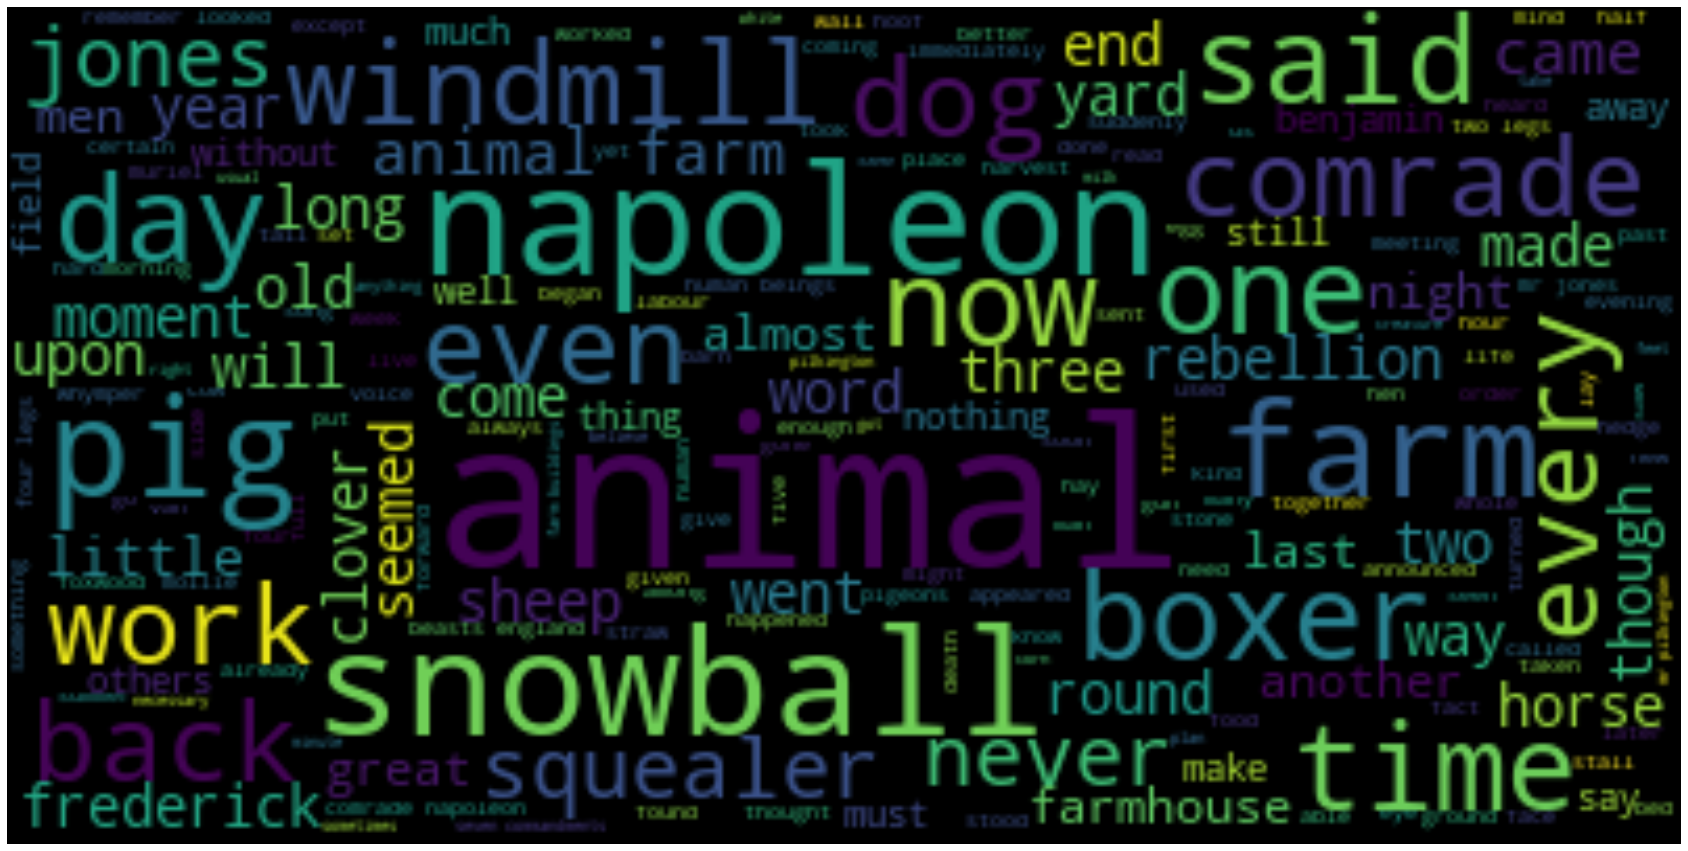

In [191]:
from wordcloud import WordCloud
#WordFrequency = open('data/Word Frequency Summary.txt')  
# WordCloud = WordCloud().generate(mytext)
# %pylab inline
# import matplotlib.pyplot as plt
# plt.imshow(WordCloud, interpolation='bilinear')
# plt.axis("off")

wordcloud = WordCloud(background_color="black", max_font_size=50).generate(KiteRunner)
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [206]:
def getText():    
    txt=open('data/Animal Farm.txt','r').read()    
    txt=txt.lower()    
    for ch in "~@#$%^&*()_-+=<>?/,.:;{}[]|\'""":    
        txt=txt.replace(ch,' ')       
    return txt 
KiteRunner=getText()    
words=KiteRunner.split() 
words

f=open("data/Word Frequency Summary Of Character copy.txt","w") 

for word in words:
    if word in includes:
        f.write("  \n"+word+"  \n")
#         print(f)
        print(word)

WordFrequencyCharacter = "data/Word Frequency Summary Of Character copy.txt"
with open(WordFrequencyCharacter) as f:
    mytext1 = f.read()
    
wordcloud = WordCloud(background_color="orange", max_font_size=70).generate(mytext1)
plt.figure(figsize=(10, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# mytext1

mr
jones
mrs
jones
major
mr
jones
major
major
boxer
clover
clover
boxer
benjamin
benjamin
boxer
clover
mollie
mr
jones
boxer
clover
major
moses
major
jones
clover
boxer
jones
jones
major
major
major
major
clover
major
mr
jones
major
major
major
snowball
mr
jones
snowball
squealer
squealer
major
mr
jones
mr
jones
jones
mollie
snowball
snowball
mollie
snowball
mollie
moses
moses
mr
jones
moses
clover
moses
boxer
clover
mr
jones
moses
mr
jones
mr
jones
mr
jones
jones
mrs
jones
moses
jones
jones
jones
mr
jones
snowball
boxer
mr
jones
snowball
mollie
mrs
jones
boxer
snowball
snowball
mr
jones
snowball
snowball
snowball
snowball
squealer
snowball
snowball
jones
snowball
jones
boxer
clover
jones
boxer
boxer
jones
mollie
benjamin
jones
jones
snowball
mrs
jones
snowball
snowball
snowball
benjamin
clover
boxer
mollie
snowball
snowball
snowball
snowball
snowball
squealer
jones
jones
squealer
jones
jones
snowball
mr
jones
jones
mr
pilkington
mr
frederick
frederick
pilkington
frederick
pilkington
c

(-0.5, 399.5, 199.5, -0.5)

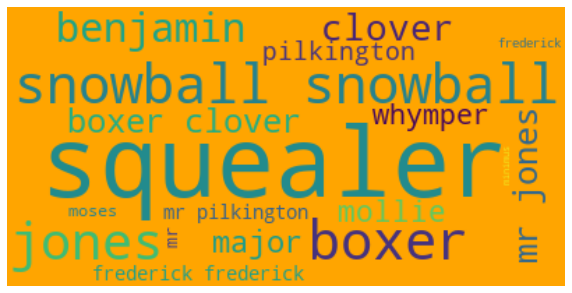

In [208]:
WordFrequencyCharacter = "data/Word Frequency Summary Of Character copy.txt"
with open(WordFrequencyCharacter) as f:
    mytext1 = f.read()
    
wordcloud = WordCloud(background_color="orange", max_font_size=70).generate(mytext1)
plt.figure(figsize=(10, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# mytext1

<font color=green size=4> ***Analysis conclusion:***</font>

From the wordcloud graph, we can see the frequency of words show. The bigger the word shows, the higher frequency it takes. We can grap some interesting things from those graph.

<font color=black size=3> **a.comrade vs leaders**</font>

A intersting thing is that these animals want to overthrow the control of human, and build a new equal farm. However, by rebellions, we see the important characters, like Snowball, Napoleon, they take the authority to be new leaders. Which verify the well-knowing saying in this novel:
All animals are comrades.
All animals are equal, but some animals are more equal than others.

<font color=black size=3> **b. gender politics**</font>

From the wordcloud of names, we can see mr but not mrs. In this novel, maybe it kind of shows the power usually hold by men as stereotype think.

#  <font color=blue size=6> Ⅴ. Relationship Analysis </font>

In [46]:
、、Ⅳ、Ⅴ、Ⅵ、Ⅶ、Ⅷ、Ⅸ、Ⅸ、Ⅹ、Ⅺ、Ⅻ

SyntaxError: invalid character in identifier (<ipython-input-46-fb9c2c0feed7>, line 1)

In [47]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
#from dic import iterkeys

In [48]:
with open("data/Animal Farm.txt") as text:
    book_text = text.read()

<font color=black size=4>***Step 1: Split chapters&remove meaningless marks***</font>

In [49]:
#split at .? changes
 
book_text = book_text.replace('—From', ' * * * ')
for ch in "?.":    
    book_text=book_text.replace(ch,'* * *')
sections = book_text.split('* * *') 
book_text=book_text.lower()    
for ch in "~@#$%^&*()_-+=<>/,:;{}[]|\'""":    
    book_text=book_text.replace(ch,' ')     


In [50]:
#remove all dialogue
cleaned_sections = []

for section in sections:
    quotes = re.findall("“.*?”", section)
    for quote in quotes:
        section = section.replace(quote, " ")
    cleaned_sections.append(section)

In [51]:
#Create characters list and cooccurnce matrix
characters = ['snowball','napoleon','major','wyndle ', 'boxer', 'squealer', 'mollie', 'clover',
              'benjamin', 'moses', 'jones', 'pilkington', 'whymper', 
              'frederick']
characters = [character.title() for character in characters] #oops title case

In [52]:
#--> iterate through each and store in dictionary
sections_dictionary = {}
iterative = 0
for section in cleaned_sections:
    iterative += 1
    for char in characters:
        if char in section:
            if str(iterative) in sections_dictionary.keys():
                sections_dictionary[str(iterative)].append(char)  
            else:
                sections_dictionary[str(iterative)] = [char]       

<font color=black size=4>***Step 2: Create nodes & edges***</font>

In [53]:
##set base df (co-occurance matrix)
df = pd.DataFrame(columns = characters, index = characters)
df[:] = int(0)

#iterate through each POV of book and add one for each character-character relationship
#-> in this case, relationship equates to appearing in the same POV
for value in sections_dictionary.values():
    for character1 in characters:
        for character2 in characters:
            if character1 in value and character2 in value:
                df[character1][character2] += 1
                df[character2][character1] += 1

In [54]:
#add weights to edges
edge_list = [] #test networkx
for index, row in df.iterrows():
    i = 0
    for col in row:
        weight = float(col)/464
        edge_list.append((index, df.columns[i], weight))
        i += 1

#Remove edge if 0.0
updated_edge_list = [x for x in edge_list if not x[2] == 0.0]

#create duple of char, occurance in novel
node_list = []
for i in characters:
    for e in updated_edge_list:
        if i == e[0] and i == e[1]:
            node_list.append((i, e[2]*6))
for i in node_list:
    if i[1] == 0.0:
        node_list.remove(i)

#remove self references
for i in updated_edge_list:
    if i[0] == i[1]:
        updated_edge_list.remove(i)
        


<font color=black size=4>***Step 3: Abstract infomation into CSV file***</font>

In [278]:
updated_edge_list

[('Snowball', 'Napoleon', 0.1206896551724138),
 ('Snowball', 'Boxer', 0.004310344827586207),
 ('Snowball', 'Squealer', 0.008620689655172414),
 ('Snowball', 'Mollie', 0.004310344827586207),
 ('Snowball', 'Benjamin', 0.004310344827586207),
 ('Snowball', 'Jones', 0.03879310344827586),
 ('Snowball', 'Pilkington', 0.008620689655172414),
 ('Snowball', 'Frederick', 0.008620689655172414),
 ('Napoleon', 'Snowball', 0.1206896551724138),
 ('Napoleon', 'Major', 0.004310344827586207),
 ('Napoleon', 'Boxer', 0.05172413793103448),
 ('Napoleon', 'Squealer', 0.04310344827586207),
 ('Napoleon', 'Clover', 0.017241379310344827),
 ('Napoleon', 'Benjamin', 0.004310344827586207),
 ('Napoleon', 'Jones', 0.017241379310344827),
 ('Napoleon', 'Pilkington', 0.01293103448275862),
 ('Napoleon', 'Whymper', 0.03017241379310345),
 ('Napoleon', 'Frederick', 0.03017241379310345),
 ('Major', 'Napoleon', 0.004310344827586207),
 ('Major', 'Boxer', 0.004310344827586207),
 ('Major', 'Clover', 0.004310344827586207),
 ('Boxer'

In [56]:
import pandas as pd
name=['source','target','weight']
Farm_Network=pd.DataFrame(columns=name,data=updated_edge_list)
# print(test)
Farm_Network.to_csv('data/Farm_Network.csv',encoding='utf-8')


In [57]:
#set canvas size
#networkx graph time!
G = nx.Graph()
for i in sorted(node_list):
    G.add_node(i[0], size = i[1])
G.add_weighted_edges_from(updated_edge_list)

#check data of graphs
# G.nodes(data=True)
# G.nodes.to_csv('data/Farmer_nodes.csv')
G.edges(data = True)
result = G.edges(data = True)

In [58]:
Farm_Network = pd.read_csv('data/Farm_Network.csv')
Farm_Network

,Unnamed: 0,source,target,weight
0,0,Snowball,Napoleon,0.120690
1,1,Snowball,Boxer,0.004310
2,2,Snowball,Squealer,0.008621
3,3,Snowball,Mollie,0.004310
4,4,Snowball,Benjamin,0.004310
...,...,...,...,...
61,61,Frederick,Snowball,0.008621
62,62,Frederick,Napoleon,0.030172
63,63,Frederick,Squealer,0.004310
64,64,Frederick,Pilkington,0.034483


<font color=black size=4>***Step 4: Generate Social Graph***</font>

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


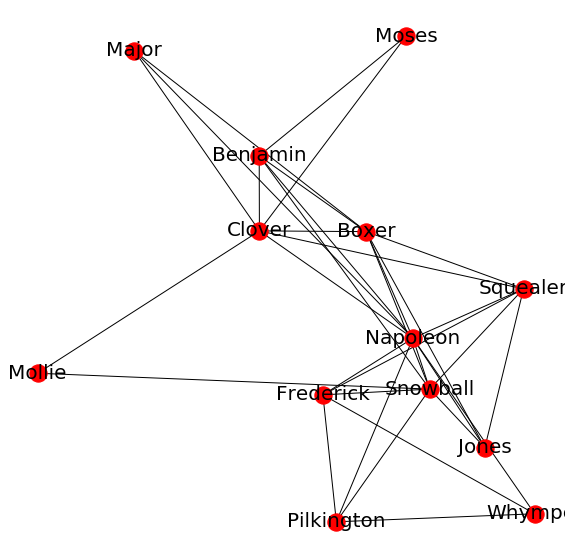

In [59]:
#set canvas size
plt.subplots(figsize=(10,10))

#networkx graph time!
G = nx.Graph()
for i in sorted(node_list):
    G.add_node(i[0], size = i[1])
G.add_weighted_edges_from(updated_edge_list)

#check data of graphs
G.nodes(data=True)
G.edges(data = True)

#manually copy and pasted the node order using 'nx.nodes(G)'
#Couldn't determine another route to listing out the order of nodes for future work
node_order = ['snowball','napoleon','major','wyndle ', 'boxer', 'squealer', 'mollie', 'clover',
              'benjamin', 'moses', 'jones', 'jones', 'pilkington', 'whymper', 
              'frederick']

#reorder node list
updated_node_order = []
for i in node_order:
    for x in node_list:
        if x[0] == i:
            updated_node_order.append(x)
            
#reorder edge list - this was a pain
test = nx.get_edge_attributes(G, 'weight')
updated_again_edges = []
for i in nx.edges(G):
    for x in test.keys():
        if i[0] == x[0] and i[1] == x[1]:
            updated_again_edges.append(test[x])
# G.nodes(data=True)
type(G.edges(data=True))


AFG = nx.Graph()
AFG.add_edges_from(G.edges(data=True))
nx.draw(G, pos=nx.spring_layout(G),
        with_labels=True, node_color='red', font_size="20")
# for row in G.nodes(data=True):
#     AFG.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])

<font color=green size=4> ***Analysis conclusion:***</font>

<font color=black size=3> **a.the location of each node represents their importence level in this book.**</font>

 From the social graph provided by networkx method, we can see through the relationships between every character. In the centre of network graph is Snowball which is apparrently our main character and has the most complex connection with other characters. The other central characters are Napoleon and Squealer who both play significant roles in the process of the whole story. 

<font color=black size=3> **b.the distance between every two nodes shows the connection level.**</font>

Also the distance of every two nodes directly presents the strength of their relationship. For example, three main characters(Snowball, Napoleon and Squealer) has the closest distance, which means those characters have the strongest connection and affect greatly to the other two. The further the distance is, the lighter relationship they have.

### Sentiment Analysis

Sentiment Analysis is understanding how **positive** or **negative** a review is. There are many ways in practice to compute a sentiment value. For example:

- Have a list of positive words and a list of negative words and count how many occur in a document. 
- Train a classifier given many examples of positive documents and negative documents. 
    - Note that this technique is often just an automated way to derive the first (e.g., using bag-of-words with logistic regression, a coefficient is assigned to each word!).

For the most accurate sentiment analysis, you will want to train a custom sentiment model based on documents that are particular ***to your application***. Generic models (such as the one we are about to use) often do not work as well as hoped.

As we will do below, always make sure you double-check that the algorithm is working by manually verifying that scores correctly correspond to positive/negative reviews! Otherwise, you may be using numbers that are not accurate!



In [2]:
WordFrequency = "data/Animal Farm.txt"
#  txt=open('data/Animal Farm.txt','r').read()    
#     txt=txt.lower() 
WordFrequency = WordFrequency.lower()
with open(WordFrequency) as AF:
    sen = AF.read()

In [36]:
from textblob import TextBlob
AFS = TextBlob(sen)
len(AFS.sentences)

NameError: name 'sen' is not defined

In [ ]:
# import pandas as pd
# name=['source','target','weight']
# Farm_Network=pd.DataFrame(columns=name,data=updated_edge_list)
# # print(test)
# Farm_Network.to_csv('data/Farm_Network.csv',encoding='utf-8')

SentimentAnalysis=[]
# Polarity ranges from -1 (most negative) to 1 (most positive).
for i in range(1,len(AFS.sentences)):
#     print(AFS.sentences[i])
    if "Snowball" in AFS.sentences[i]:
#         print(AFS.sentences[i].sentiment)
        SentimentAnalysis.append(('Snowball',AFS.sentences[i],AFS.sentences[i].sentiment.polarity)),
    if "Napoleon"in AFS.sentences[i]:
          SentimentAnalysis.append(('Napoleon',AFS.sentences[i],AFS.sentences[i].sentiment.polarity)),
    if "Squealer"in AFS.sentences[i]:
          SentimentAnalysis.append(('Squealer',AFS.sentences[i],AFS.sentences[i].sentiment.polarity)),   
    if "Boxer"in AFS.sentences[i]:
          SentimentAnalysis.append(('Boxer',AFS.sentences[i],AFS.sentences[i].sentiment.polarity)),
    if "Jones"in AFS.sentences[i]:
          SentimentAnalysis.append(('Jones',AFS.sentences[i],AFS.sentences[i].sentiment.polarity)),
    if "Clover"in AFS.sentences[i]:
          SentimentAnalysis.append(('Clover',AFS.sentences[i],AFS.sentences[i].sentiment.polarity)),
    if "Mr"in AFS.sentences[i]:
          SentimentAnalysis.append(('Mr',AFS.sentences[i],AFS.sentences[i].sentiment.polarity)),
    if "Frederick"in AFS.sentences[i]:
          SentimentAnalysis.append(('Frederick',AFS.sentences[i],AFS.sentences[i].sentiment.polarity)),
    if "Benjamin"in AFS.sentences[i]:
          SentimentAnalysis.append(('Benjamin',AFS.sentences[i],AFS.sentences[i].sentiment.polarity)),
    if "Pilkington"in AFS.sentences[i]:
          SentimentAnalysis.append(('Pilkington',AFS.sentences[i],AFS.sentences[i].sentiment.polarity)),
            
name=['Character','Sentence','Sentiment',]
Farm_Network=pd.DataFrame(columns=name,data=SentimentAnalysis)
# print(test)
Farm_Network.to_csv('data/SentimentAnalysis.csv',encoding='utf-8')


In [37]:
CharacterSentimentAnalysis =pd.read_csv('data/SentimentAnalysis.csv')
CharacterSentimentAnalysis.head()

,Unnamed: 0,Character,Sentence,Sentiment
0,0,Jones,"You may copy it, give it away or re-use it und...",-0.500000
1,1,Mr,"You may copy it, give it away or re-use it und...",-0.500000
2,2,Jones,With the ring of light\nfrom his lantern danci...,0.133333
3,3,Mr,With the ring of light\nfrom his lantern danci...,0.133333
4,4,Jones,It had been agreed that they should all meet i...,0.250000


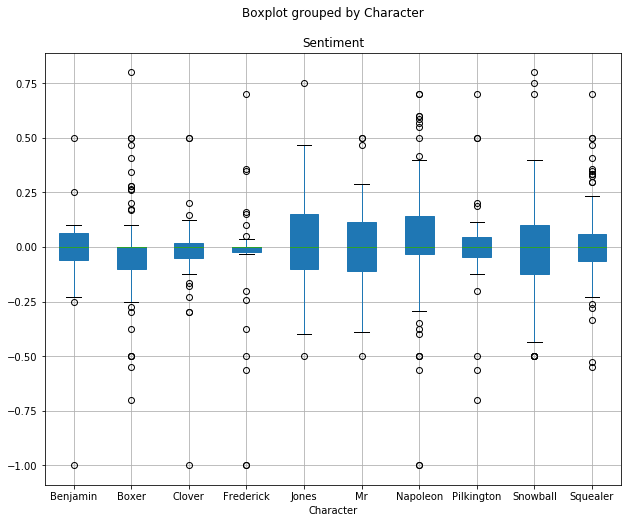

In [38]:
# colors = ['pink', 'lightblue', 'lightgreen']
# for patch, color in zip(bplot['boxes'], colors):
#     patch.set_facecolor(color)
CharacterSentimentAnalysis.boxplot(column='Sentiment', by='Character', figsize=(10,8),patch_artist=True)


In [341]:
CharacterSentimentAnalysis[CharacterSentimentAnalysis.Sentiment == 0.8].head(10)

,Unnamed: 0,Character,Sentence,Sentiment
340,340,Snowball,"""Snowball fought bravely at the Battle\nof the...",0.8
369,369,Boxer,Boxer saw them\ncoming and put out his great h...,0.8


In [342]:
CharacterSentimentAnalysis[CharacterSentimentAnalysis.Sentiment == -1].head(10)

,Unnamed: 0,Character,Sentence,Sentiment
11,11,Benjamin,"Benjamin was the oldest animal\non the farm, a...",-1.0
302,302,Napoleon,Napoleon acted swiftly and\nruthlessly.,-1.0
442,442,Frederick,"Moreover, terrible\nstories were leaking out f...",-1.0
485,485,Napoleon,Napoleon called the animals together immediate...,-1.0
486,486,Frederick,Napoleon called the animals together immediate...,-1.0
621,621,Clover,cried Clover in a terrible voice.,-1.0


## IDF from DINO

In [144]:
vect = TfidfVectorizer(stop_words='english')

# Fit transform Yelp data.
dtm = vect.fit_transform(CharacterSentimentAnalysis.Sentence)
features = vect.get_feature_names()
dtm.shape

(710, 2068)

In [145]:
def summarize():
    
    # Choose a random review that is at least 300 characters long
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(CharacterSentimentAnalysis.Sentence))
        review_text = CharacterSentimentAnalysis.Sentence[review_id]
        #review_text = unicode(yelp.text[review_id], 'utf-8')
        review_length = len(review_text)
    
    # Create a dictionary of words and their TF–IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # Print words with the top five TF–IDF scores
    print('TOP SCORING WORDS:')
    top_scores = sorted(list(word_scores.items()), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
    
    # Print five random words
    print(('\n' + 'RANDOM WORDS:'))
    random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
    for word in random_words:
        print(word)
    
    # Print the review
    print(('\n' + review_text))

In [146]:
summarize()

TOP SCORING WORDS:
knoll
accord
huddling
warmth
flock

RANDOM WORDS:
knoll
benjamin
clover
disappeared
napoleon

They had made their way on to the little knoll where the
half-finished windmill stood, and with one accord they all lay down as
though huddling together for warmth--Clover, Muriel, Benjamin, the cows,
the sheep, and a whole flock of geese and hens--everyone, indeed, except
the cat, who had suddenly disappeared just before Napoleon ordered the
animals to assemble.


## tf-idf Vectorizer

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(strip_accents="ascii", lowercase="true", stop_words="english", use_idf=True)

In [148]:
SA = pd.read_csv('data/SentimentAnalysis.csv')
X=CharacterSentimentAnalysis.Sentence
tvec = vect.fit_transform(X)
# tvec= X
tvec.shape

(710, 2068)

In [149]:
#vect.get_feature_names()

weights = np.asarray(tvec.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'Sentence': vect.get_feature_names(), 'Sentiment': weights})
weights_df.sort_values(by='Sentiment', ascending=False).head(10)

,Sentence,Sentiment
1201,napoleon,0.046010
207,boxer,0.044781
1680,snowball,0.040658
974,jones,0.029723
1725,squealer,0.025082
1189,mr,0.024513
60,animals,0.023965
1558,said,0.023874
310,clover,0.023233
637,farm,0.020792


In [150]:
y = SA.Sentiment*10

In [151]:
##  split datainto test and training set
# y = SA.Sentiment*10
#y.astype(int)
y_int = []
for obj in y: 
#     print(obj)
    obj =int(round(obj))
    y_int.append(obj)

for obj in y: 
    obj =int(round(obj))+1
y=y.astype(np.int16)
    
#     print(obj)
#     print(y)

X_train, X_test, y_train, y_test = train_test_split(tvec, y, random_state=0, test_size=0.3)
print("Shape of X train:", X_train.shape)
print("Shape of y train:", y_train.shape)
print("Shape of X test:", X_test.shape)
print("Shape of y test:", y_test.shape)
type(y)
y

Shape of X train: (497, 2068)
Shape of y train: (497,)
Shape of X test: (213, 2068)
Shape of y test: (213,)


0     -5
1     -5
2      1
3      1
4      2
      ..
705    0
706    1
707   -2
708   -2
709   -2
Name: Sentiment, Length: 710, dtype: int16

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
## initialize and train KNN model
# from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#y_pred

In [154]:
print("Test set score:     {}".format(np.mean(y_pred == y_test)))

Test set score:     0.6338028169014085


In [155]:
arr=[]
for i in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    knn.predict(X_test)
    arr.append(np.mean(y_pred == y_test))
print("Test set score:     {}".format(np.mean(y_pred == y_test)))

Test set score:     0.6338028169014085


## Random forest

In [156]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.6948356807511737
Classification Report:
              precision    recall  f1-score   support

         -10       0.00      0.00      0.00         1
          -5       1.00      0.86      0.92         7
          -4       0.00      0.00      0.00         2
          -3       1.00      0.50      0.67         4
          -2       0.80      0.47      0.59        17
          -1       0.64      0.41      0.50        17
           0       0.68      0.96      0.80       114
           1       0.58      0.35      0.44        20
           2       1.00      0.43      0.60         7
           3       0.67      0.22      0.33         9
           4       0.00      0.00      0.00         2
           5       1.00      0.11      0.20         9
           6       0.00      0.00      0.00         1
           7       1.00      0.67      0.80         3

    accuracy                           0.69       213
   macro avg       0.60      0.36      0.42       213
weighted avg       0.70     

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [158]:
feature_imp = pd.Series(clf.feature_importances_, index=vect.get_feature_names()).sort_values(ascending=False)
feature_imp[:10]

time            0.017702
terrible        0.014908
able            0.010625
boxer           0.009845
activities      0.008222
snowball        0.008124
jones           0.007666
beings          0.007415
great           0.007318
disagreement    0.007116
dtype: float64

In [159]:
#selecting only feature points which are > 0.007
feature_imp =  feature_imp[lambda x: x>0.007]
feature_imp

time            0.017702
terrible        0.014908
able            0.010625
boxer           0.009845
activities      0.008222
snowball        0.008124
jones           0.007666
beings          0.007415
great           0.007318
disagreement    0.007116
dtype: float64

Text(0.5, 1.0, 'Visualizing Important Features')

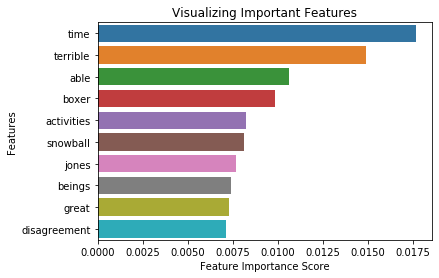

In [162]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [163]:
# Split dataset into features and labels
X1=tvec[:,pd.Series(feature_imp)]  
y1=y                                      
# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.70, random_state=5) # 70% training and 30% test

In [164]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X1_train,y1_train)

# prediction on test set
y1_pred=clf.predict(X1_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y1_test, y1_pred))
#print("ROC:", roc_auc_score(y1_test,  nbm.predict_proba(X1_test)[:,1]))
print("Classification Report:")
print(classification_report(y1_test,y1_pred))

Accuracy: 0.5291750503018109
Classification Report:
              precision    recall  f1-score   support

         -10       0.00      0.00      0.00         4
          -7       0.00      0.00      0.00         2
          -5       1.00      0.07      0.13        14
          -4       0.00      0.00      0.00         3
          -3       0.00      0.00      0.00        15
          -2       0.00      0.00      0.00        33
          -1       0.00      0.00      0.00        38
           0       0.53      1.00      0.69       262
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1

    accuracy                

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [165]:
improvemnet = RandomForestClassifier(n_estimators=1000, criterion='gini', 
                                     max_depth=None,min_samples_split=2, 
                                     min_samples_leaf=100, min_weight_fraction_leaf=0.0,
                                     max_features='auto', max_leaf_nodes=None,bootstrap=True,
                                     oob_score=True, n_jobs=-1, random_state=40,
                                     verbose=0, warm_start=False,class_weight=None)
improvemnet.fit(X_train, y_train)
y_pred= improvemnet.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.5352112676056338
Classification Report:
              precision    recall  f1-score   support

         -10       0.00      0.00      0.00         1
          -5       0.00      0.00      0.00         7
          -4       0.00      0.00      0.00         2
          -3       0.00      0.00      0.00         4
          -2       0.00      0.00      0.00        17
          -1       0.00      0.00      0.00        17
           0       0.54      1.00      0.70       114
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3

    accuracy                           0.54       213
   macro avg       0.04      0.07      0.05       213
weighted avg       0.29     

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree

In [166]:
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.5258215962441315
Classification Report:
              precision    recall  f1-score   support

         -10       0.00      0.00      0.00         1
          -5       1.00      0.14      0.25         7
          -4       0.00      0.00      0.00         2
          -3       0.00      0.00      0.00         4
          -2       0.00      0.00      0.00        17
          -1       0.00      0.00      0.00        17
           0       0.54      0.95      0.69       114
           1       0.18      0.10      0.13        20
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         9
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3

    accuracy                           0.53       213
   macro avg       0.19      0.12      0.12       213
weighted avg       0.35     

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic Regression ##

In [167]:
std = StandardScaler(with_mean=False)
X1_train = std.fit_transform(X_train)
X1_test = std.transform(X_test)

In [168]:
start = time.time()

C_values = np.linspace(0.1,1,10)

cv_scores = []


for c in C_values:
    clf = LogisticRegression(C = c, class_weight = 'balanced')
    scores = cross_val_score(clf, X1_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

cv_error = [1 - x for x in cv_scores]

optimal_C = C_values[cv_error.index(min(cv_error))]
print('\nThe optimal alpha is', optimal_C)

end = time.time()
print("Total time in minutes = ", (end-start)/60)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warnin


The optimal alpha is 0.6
Total time in minutes =  0.013397236665089926


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


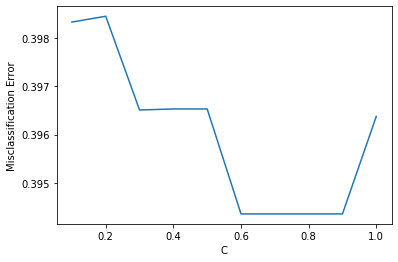

In [169]:
plt.plot(C_values, cv_error)
plt.xlabel('C')
plt.ylabel('Misclassification Error')
plt.show()

In [124]:
clf = LogisticRegression(C = optimal_C)
clf.fit(X1_train, y_train)
y_pred = clf.predict(X1_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 65.25821596244131


array([[ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  8,  0,  4,  2,  1,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  8,  8,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  1,  1,  0,  3, 95,  5,  5,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  9,  9,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  5,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  5,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  7,  0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2]])

In [125]:
idx = (-abs(clf.coef_)).argsort()[0,:10]
print("Top 50 features:")
for i in idx:
    print(vect.get_feature_names()[i])

Top 50 features:
boxer
terrible
napoleon
snowball
squealer
clover
jones
said
pilkington
mr


## SVM Model ##

In [142]:
from sklearn.svm import SVC
svc = SVC(kernel="linear", C=1, probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_score(y_test, y_pred_svc)
svc.predict_proba(X_test)[:,2]


array([0.10278339, 0.02552636, 0.02570524, 0.01948771, 0.06605026,
       0.0222819 , 0.03212009, 0.04206213, 0.03750139, 0.02770119,
       0.03689057, 0.02329582, 0.02477475, 0.02208886, 0.01795348,
       0.02706741, 0.04296937, 0.02093643, 0.02671228, 0.02897679,
       0.03326435, 0.02465689, 0.0222677 , 0.02687005, 0.03747831,
       0.01734042, 0.01459303, 0.02664065, 0.0265919 , 0.03230308,
       0.02952662, 0.02958207, 0.02875032, 0.03594681, 0.0261811 ,
       0.06129242, 0.29048444, 0.02322471, 0.02755181, 0.01942802,
       0.04697616, 0.02479439, 0.0353724 , 0.02027552, 0.02755425,
       0.03931656, 0.03094244, 0.018391  , 0.03200672, 0.01942802,
       0.02364515, 0.03672025, 0.03747831, 0.03005164, 0.02326017,
       0.0234364 , 0.02820741, 0.06700983, 0.05056176, 0.02779424,
       0.03498225, 0.02312635, 0.03942298, 0.03059277, 0.04066624,
       0.03183369, 0.0293666 , 0.028756  , 0.02667527, 0.02206214,
       0.04889545, 0.02492353, 0.02682711, 0.02326337, 0.03544

In [139]:
# y_test=y_test.dropna()
# y_test = label_binarize(y_test, classes=[0, 1, 2, 3])

In [143]:
roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])

ValueError: multiclass format is not supported

## Cross validation ##

In [134]:
## Negative review

test_string = np.array(["this product is damaged"])
tvec1 = vect.transform(test_string)
print(nbm.predict(tvec1))
print(nbm.predict_proba(tvec1))

NameError: name 'nbm' is not defined

In [135]:
## Positive review

test_string = np.array(["this product is best and would recommend to others."])
tvec1 = vect.transform(test_string)
print(nbm.predict(tvec1))
print(nbm.predict_proba(tvec1))

NameError: name 'nbm' is not defined